In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from funciones_1 import *
from tqdm import tqdm

In [3]:
# import dataset: clustering.csv
df = pd.read_csv('/Users/maxi/Downloads/Actuales/ML/ML-TP4/data/clustering.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df

A       B
0     812954  643720
1     868217  609046
2     920248  607272
3     841621  639394
4     843907  598777
...      ...     ...
4994  633450  201336
4995  662080   25631
4996  706472  171207
4997  659128  142611
4998  665898   98088

[4999 rows x 2 columns]

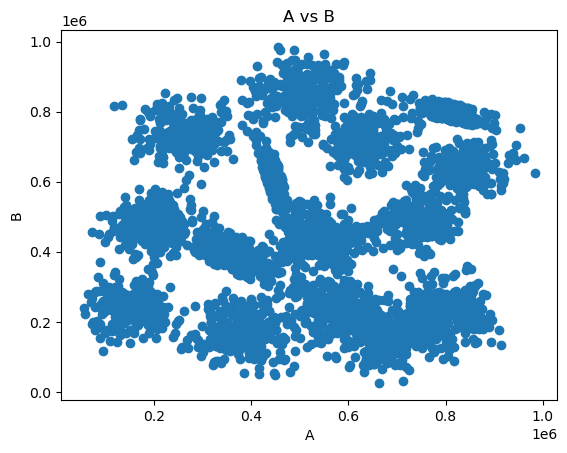

In [4]:
# Plot A vs B
plt.scatter(df['A'], df['B'])
plt.xlabel('A')
plt.ylabel('B')
plt.title('A vs B')
plt.show()

# 1. Clustering de datos. 
Para el dataset clustering.csv realizar los siguientes analisis:
## (a)
 Implementar el algoritmo KMeans y determinar la cantidad de clusters con el metodo de “ganancias decrecientes” (graficar $L$ vs. $k$, y elegir un valor $k$ donde al aumentar $k$ deje de reducir significativamente $L$). Graficar el conjunto de datos $x_i$ mostrando a que cluster pertenece cada dato (usando colores/marcadores distintos para cada cluster) y tambien mostrar el centroide de cada cluster.

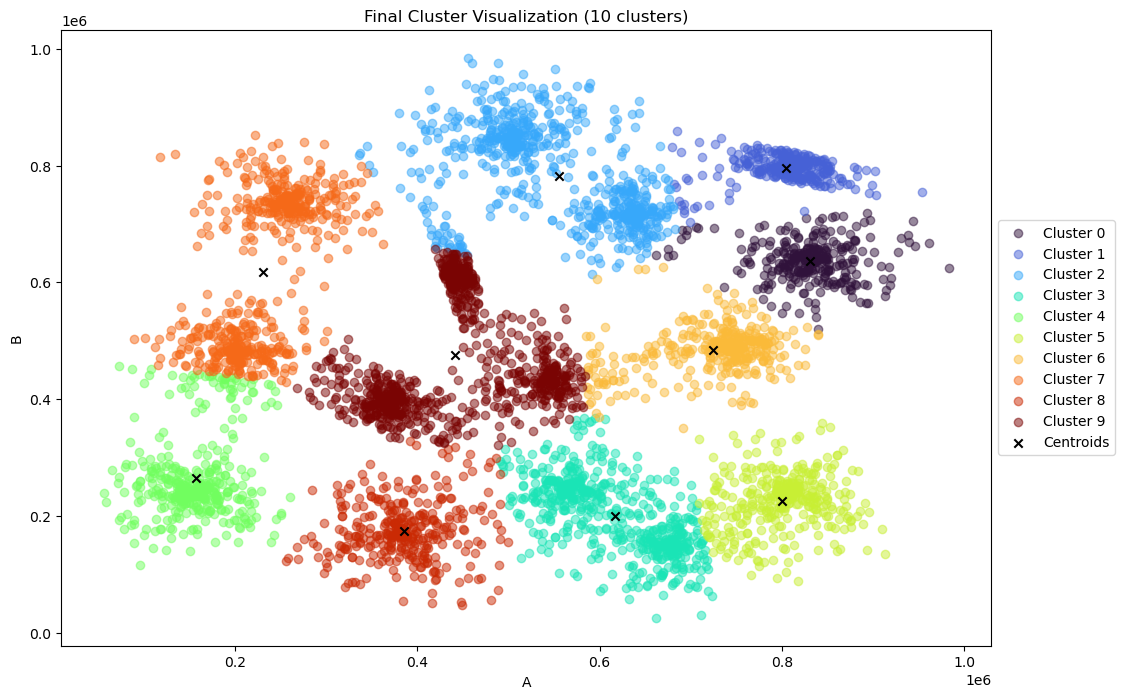

Loss: 4.68e+13


In [5]:
# K-means
X = df[['A', 'B']].values
kmeans = KMeans(num_clusters=10, max_iters=100)
kmeans.fit(X)
kmeans.plot_clusters(X)
# Loss
print(f'Loss: {kmeans.loss:.2e}')

Realizo una primera aproximación, haciendo KMeans con una cantidad de clusters arbitraria $k=10$. Se puede observar que las agrupaciones son adecuadas pero hay margen para mejorarlas. Parecería que hay que tomar un mayor número de clusters.

100%|██████████| 99/99 [00:30<00:00,  3.29it/s]


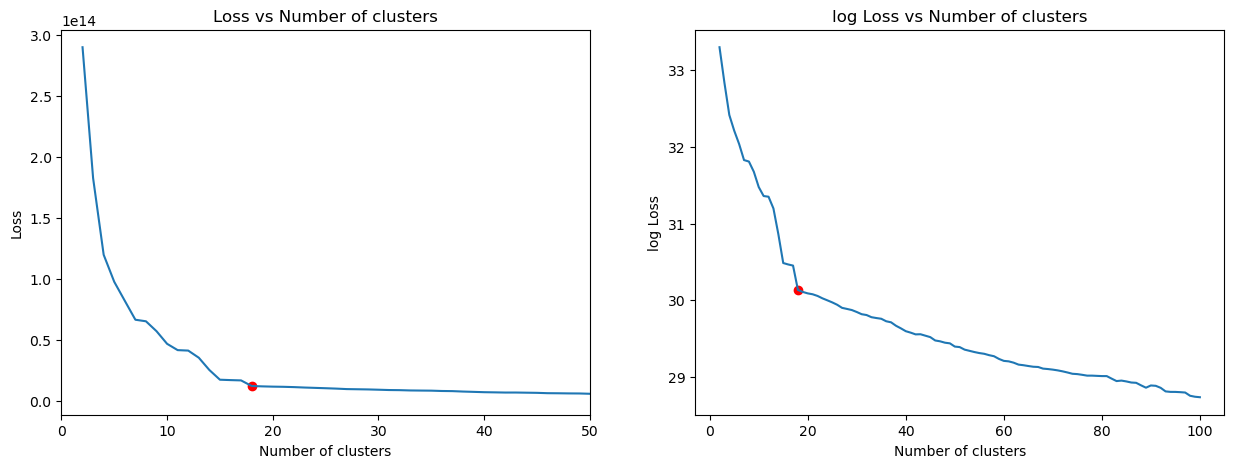

Selected number of clusters: k=18, loss=12221743701040.00


In [7]:
losses = {}
last_loss = 0.00001

for k in tqdm(range(2, 101)):
    kmeans = KMeans(num_clusters=k, max_iters=100)
    kmeans.fit(X)
    losses[k] = kmeans.loss

# 2 Sub-plots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
# Plot losses
ax[0].plot(list(losses.keys()), list(losses.values()))
ax[0].set_xlabel('Number of clusters')
ax[0].set_xlim(0, 50)
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss vs Number of clusters')
# Plot log loss
ax[1].plot(list(losses.keys()), np.log(list(losses.values())))
ax[1].set_xlabel('Number of clusters')
ax[1].set_ylabel('log Loss')
ax[1].set_title('log Loss vs Number of clusters')

# mostrar el punto k=18 en el gráfico
selected_k = 18
ax[0].scatter(selected_k, losses[18], color='red')
ax[1].scatter(selected_k, np.log(losses[18]), color='red')
plt.show()

print(f"Selected number of clusters: k={selected_k}, loss={losses[selected_k]:.2f}")

Tomo $k=18$, donde se puede observar un cambio marcado en la pendiente del gráfico. A partir de este punto el Loss decrementa con menor intensidad para cantidades crecientes de clusters.

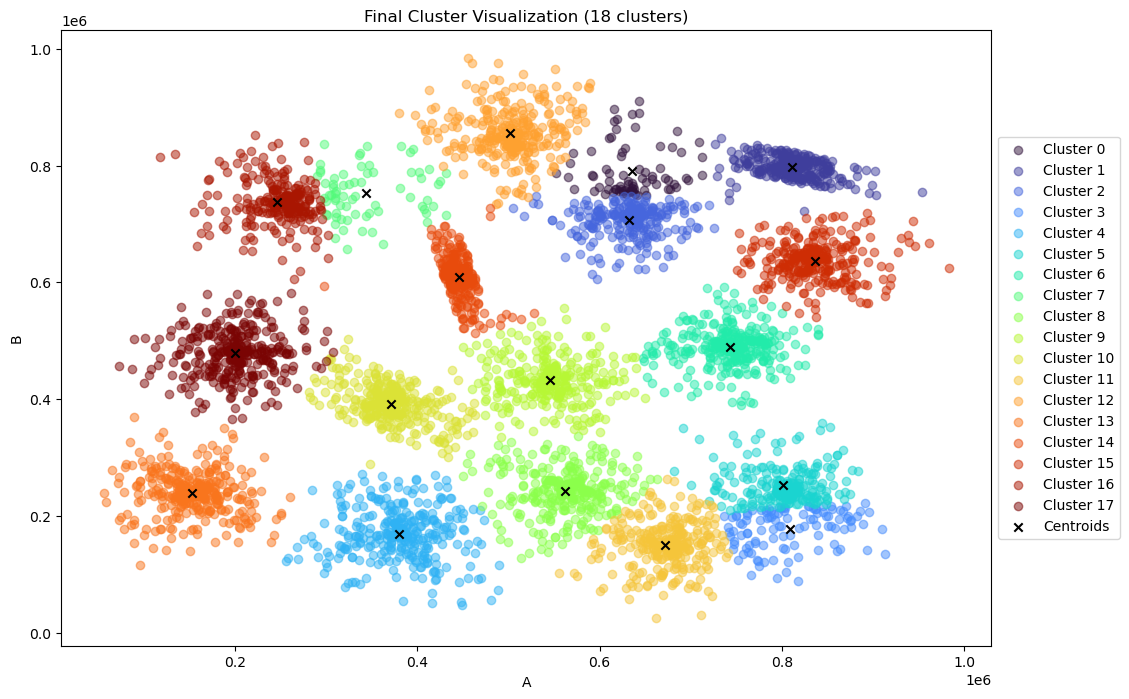

Loss: 1.22e+13


In [8]:
# K-means with selected number of clusters
kmeans = KMeans(num_clusters=selected_k, max_iters=100)
kmeans.fit(X)
kmeans.plot_clusters(X)
print(f'Loss: {kmeans.loss:.2e}')

Al realizar KMeans con $k=18$ se puede observar una buena agrupación en clusters. Comparado al caso inicial con $k=10$ se puede observar mas prolijidad en las separaciones armadas y además el Loss en este caso es aproximadamente 4 veces mas chico. 

## (b) 
Implementar el algoritmo Gaussian Mixture Model (GMM) y realizar la misma tarea que en el inciso anterior. Recuerde que puede inicializar la optimizacion de GMM con una corrida de K-means.

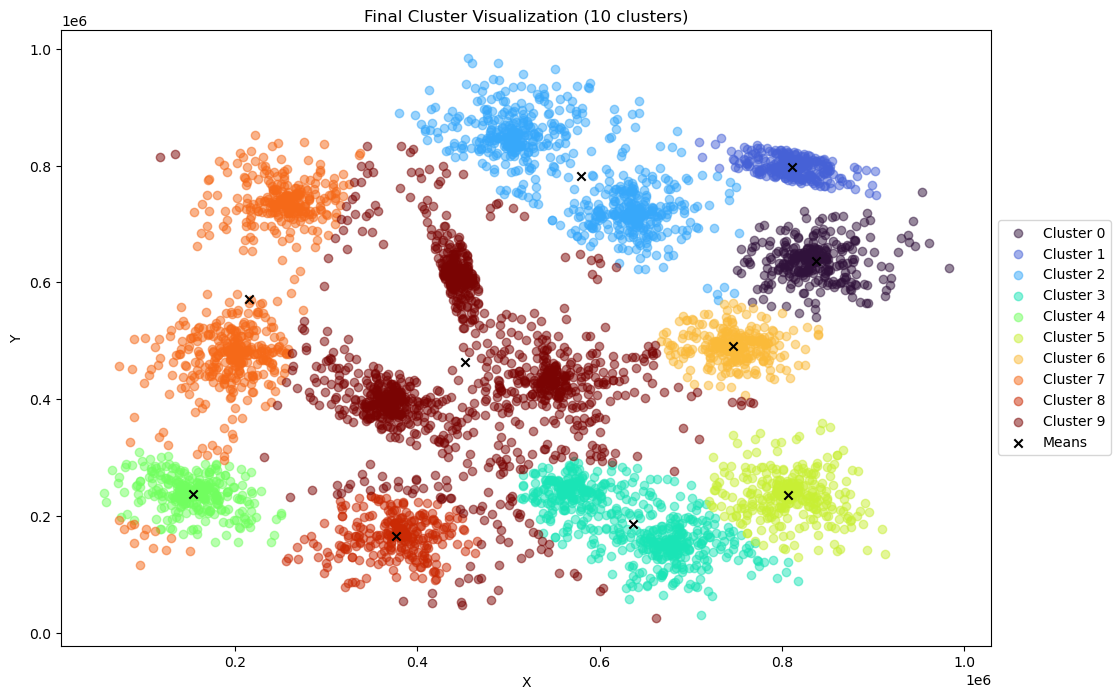

Negative log Likelihood: -1.34e+05


In [9]:
# GMM
gmm = GMM(num_components=10, max_iters=100)
gmm.fit(X)
gmm.plot_clusters(X)
print(f'Negative log Likelihood: {gmm.log_likelihood:.2e}')

In [10]:
losses = {}
last_loss = 0.00001

for k in tqdm(range(2, 41)):
    gmm = GMM(num_components=k, max_iters=100)
    gmm.fit(X)
    losses[k] = gmm.log_likelihood

100%|██████████| 39/39 [00:47<00:00,  1.22s/it]


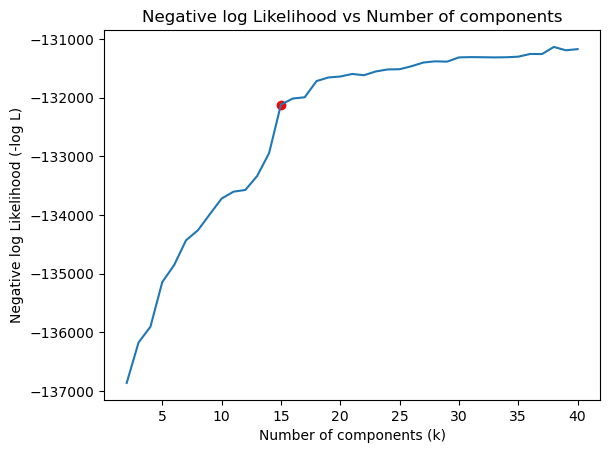

In [11]:
# Plot losses
plt.plot(list(losses.keys()), list(losses.values()))
plt.xlabel('Number of components (k)')
plt.ylabel('Negative log Likelihood (-log L)')
plt.title('Negative log Likelihood vs Number of components')
# mostrar el punto k=18 en el gráfico
selected_k = 15
plt.scatter(selected_k, losses[selected_k], color='red')
plt.show()


En este caso en $k=15$ podemos ver un marcado cambio en la pendiente de la curva.

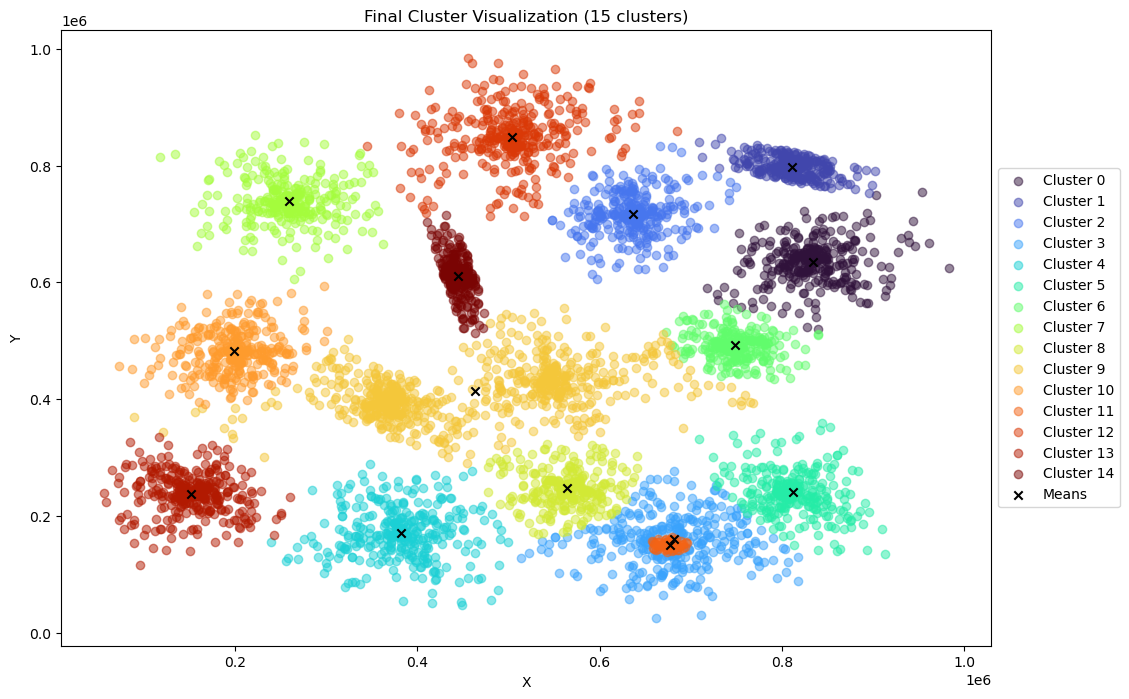

Negative log Likelihood: -1.32e+05


In [14]:
# GMM with selected number of components
gmm = GMM(num_components=selected_k, max_iters=100)
gmm.fit(X)
gmm.plot_clusters(X)
print(f'Negative log Likelihood: {gmm.log_likelihood:.2e}')

En este caso, con $k=15$ podemos ver que incrementa el Negative log likelihood (de $-1.34\times 10^5$ a $-1.32\times 10^5$). En cuanto al armado de clusters, mejora respecto del caso base con $k=10$, pero igual se forma el Cluster 11 adentro del Cluster 3, lo cual no resulta muy conveniente.

## (c) 
Implementar el algoritmo DBSCAN y aplicarlo al conjunto de datos. Explorar el efecto de variar los parametros ε (radio de la vecindad) y K (mınimo numero de puntos en una zona densa). Luego, elegir una combinacion razonable de ε y K y graficar los datos mostrando a que cluster pertenece cada uno, utilizando colores/marcadores distintos para cada cluster/ruido.

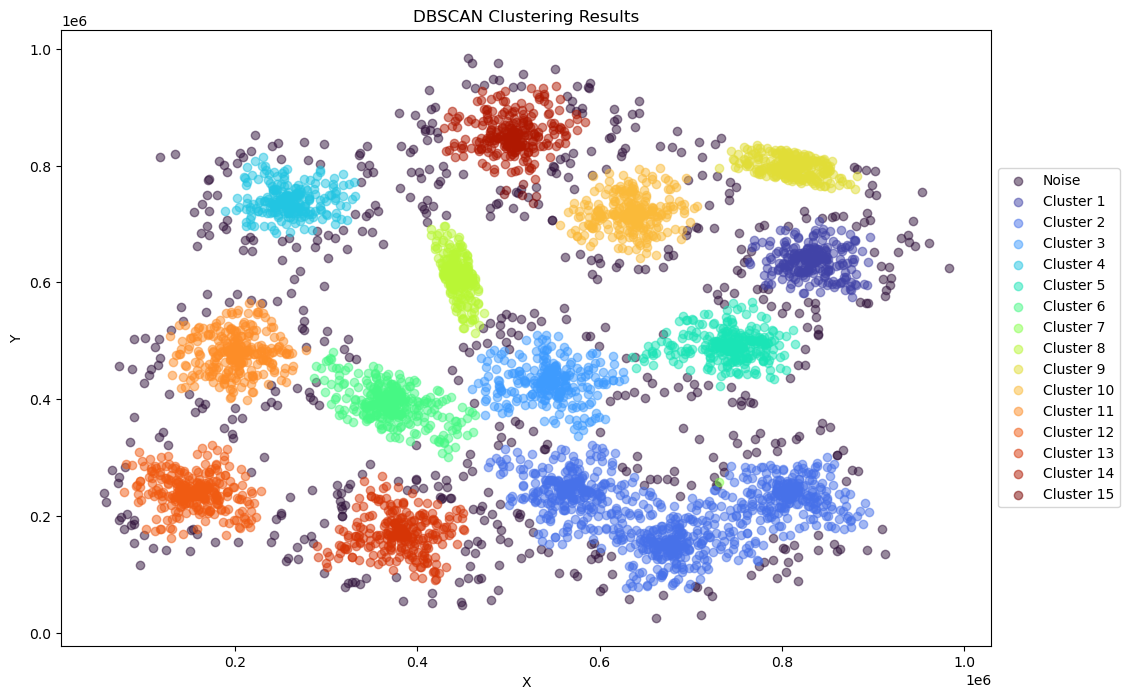

In [11]:
# DBSCAN
dbscan = DBSCAN(eps=20000, min_samples=10)
dbscan.fit(X)
dbscan.plot_clusters(X)


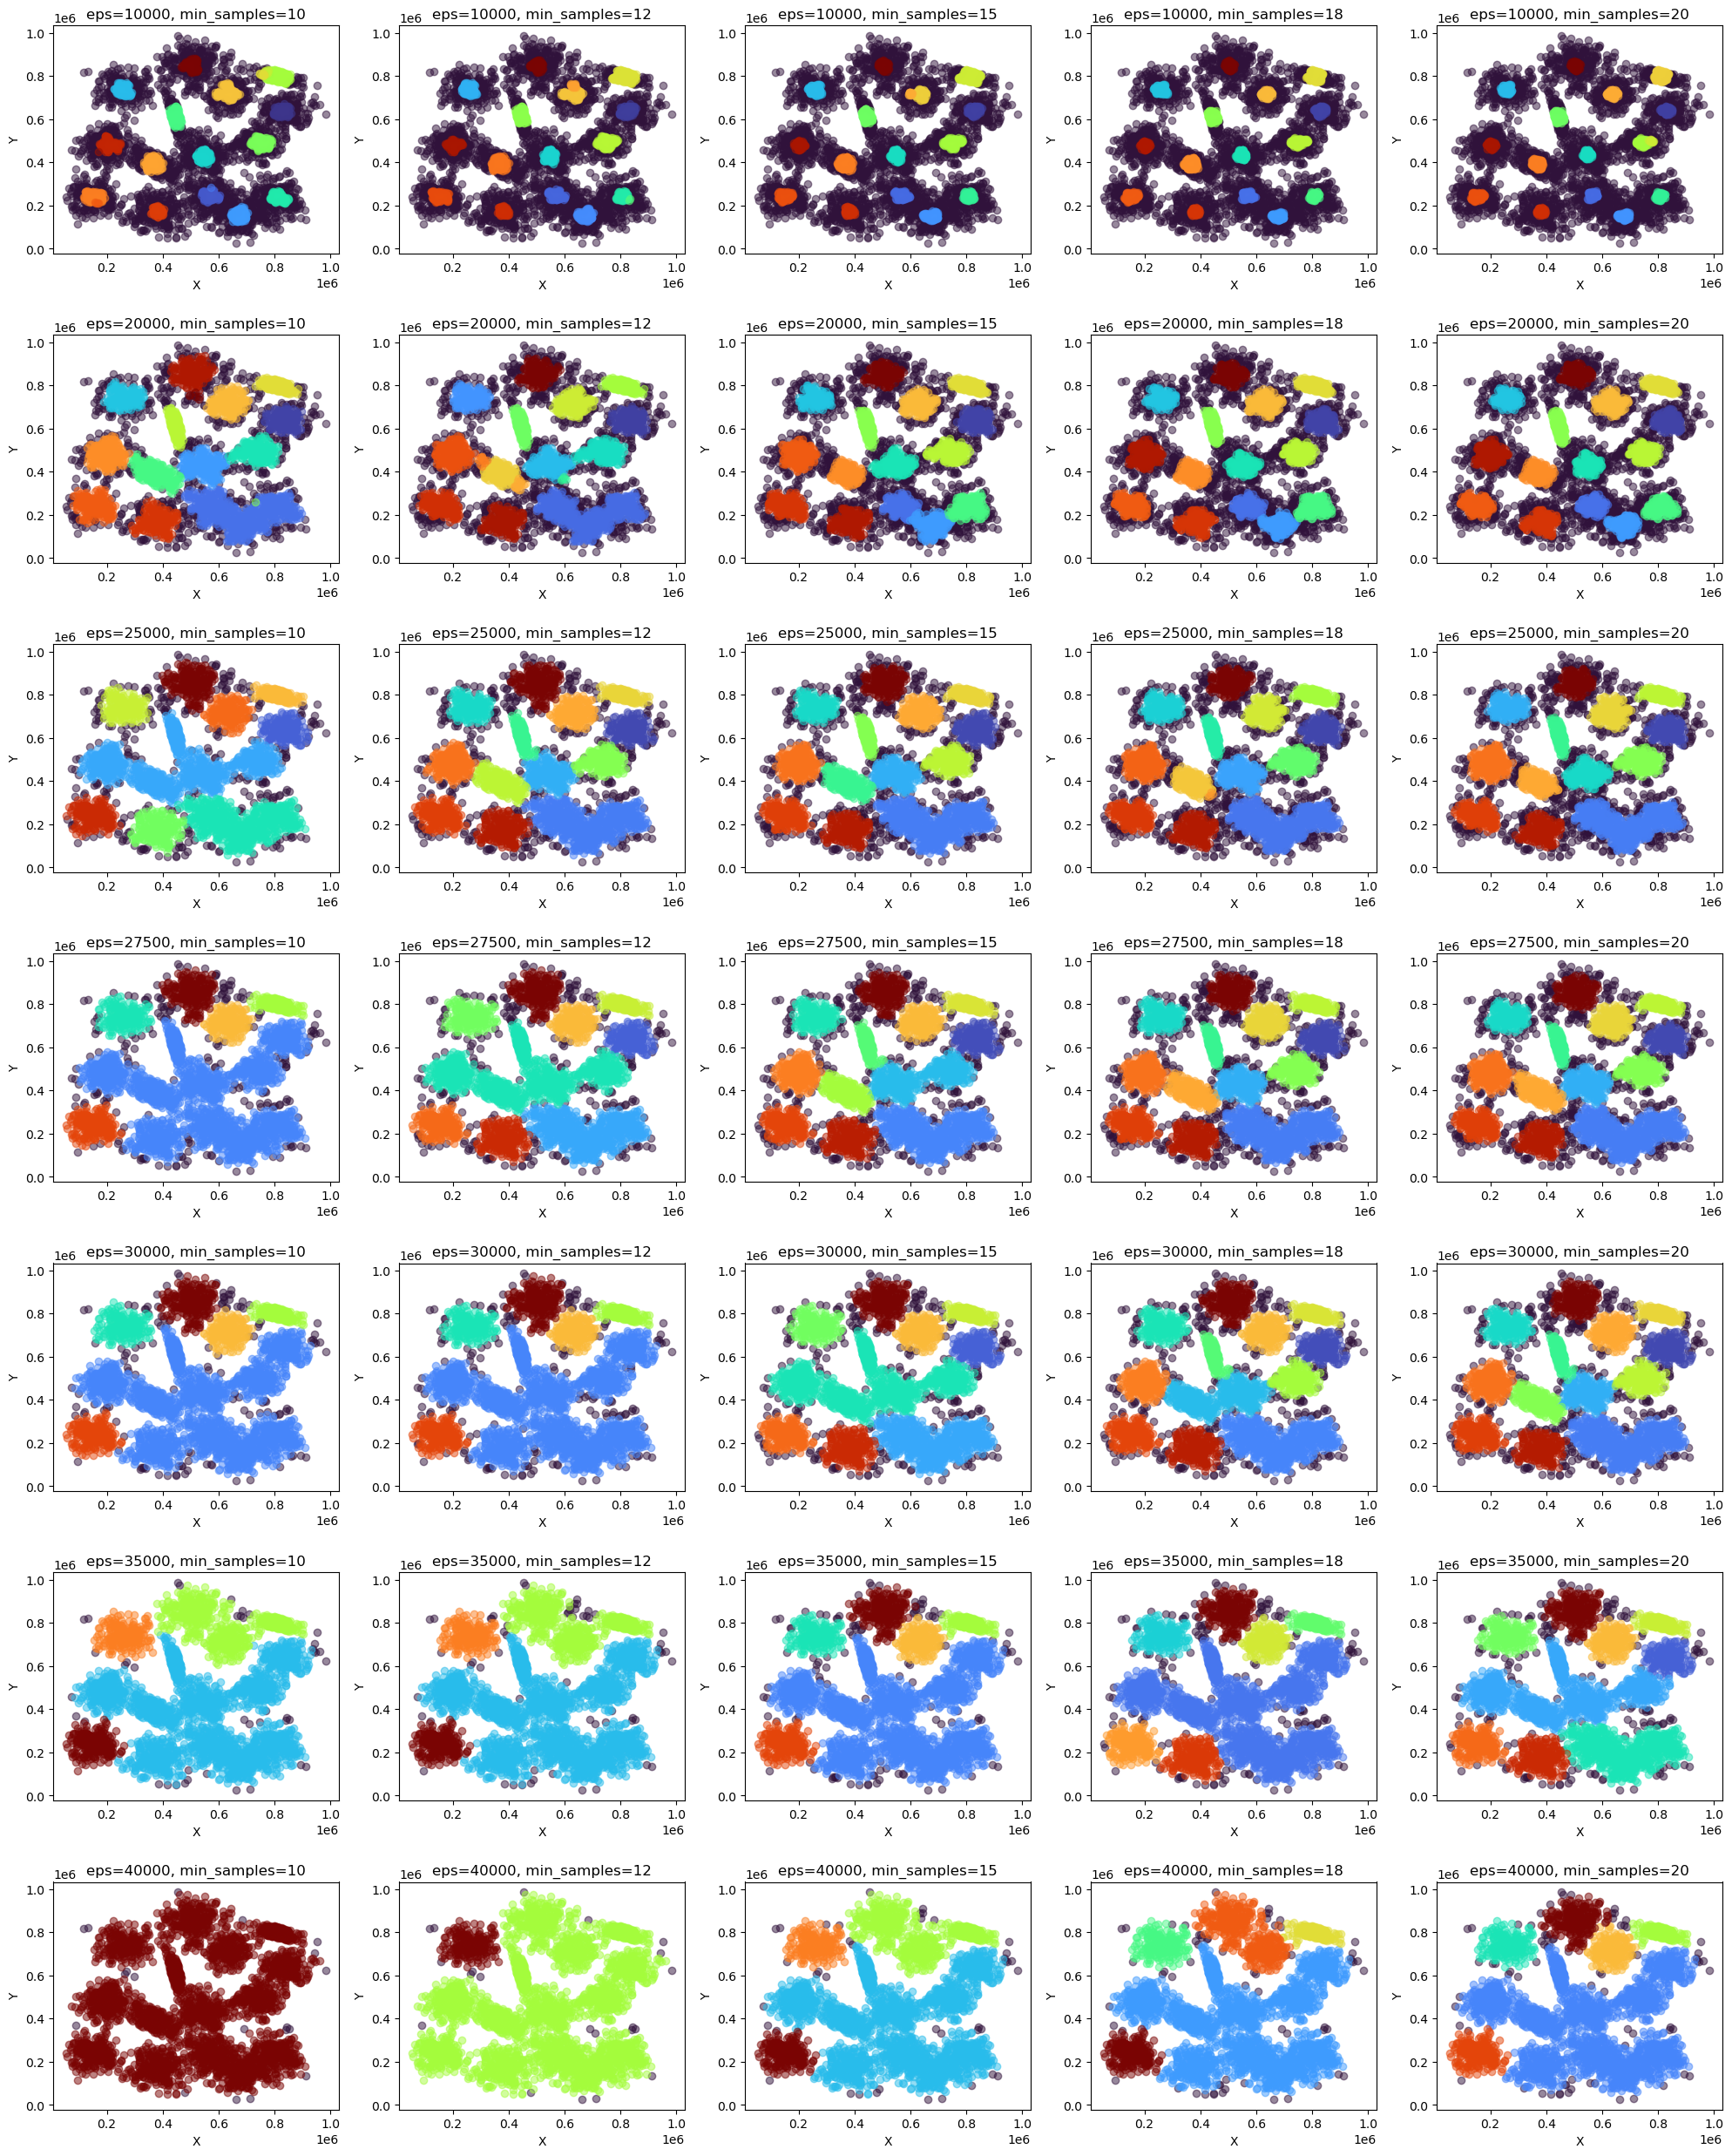

eps=10000, min_samples=10
-1     2463
 1      144
 2      129
 3        1
 4      158
 5      148
 6      128
 7      137
 8      270
 9      196
 10     278
 11       9
 12       9
 13     192
 14     203
 15     161
 16       4
 17      98
 18     149
 19       1
 20     121
Name: count, dtype: int64

eps=10000, min_samples=12
-1     2669
 1      136
 2      121
 3      144
 4      139
 5      116
 6      111
 7        2
 8      258
 9      183
 10     276
 11     160
 12      18
 13     196
 14     153
 15      93
 16     121
 17     103
Name: count, dtype: int64

eps=10000, min_samples=15
-1     2900
 1      119
 2      110
 3      127
 4      125
 5      106
 6      108
 7      243
 8      164
 9      262
 10     134
 11      12
 12     181
 13     133
 14      85
 15      99
 16      91
Name: count, dtype: int64

eps=10000, min_samples=18
-1     3087
 1      110
 2       97
 3      112
 4      119
 5       92
 6      101
 7      234
 8      143
 9      227
 10     127
 11     165

In [12]:
# test different combinations of eps y min_samples
eps_values = [10000, 20000, 25000, 27500, 30000, 35000, 40000]
min_samples_values = [10, 12, 15, 18, 20]

value_counts_dict = {}

# Plot all combinations in subplots 5x5 
fig, axs = plt.subplots(7, 5, figsize=(20, 25))
for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.plot_clusters(X, axs[i, j])
        value_counts_dict[(eps, min_samples)] = dbscan.cluster_value_counts()

# Adjust layout to prevent overlap
plt.subplots_adjust(hspace=0.5)  # Adjust horizontal space between rows

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Print value counts for each combination
for key, value in value_counts_dict.items():
    print(f'eps={key[0]}, min_samples={key[1]}')
    print(value)
    print()

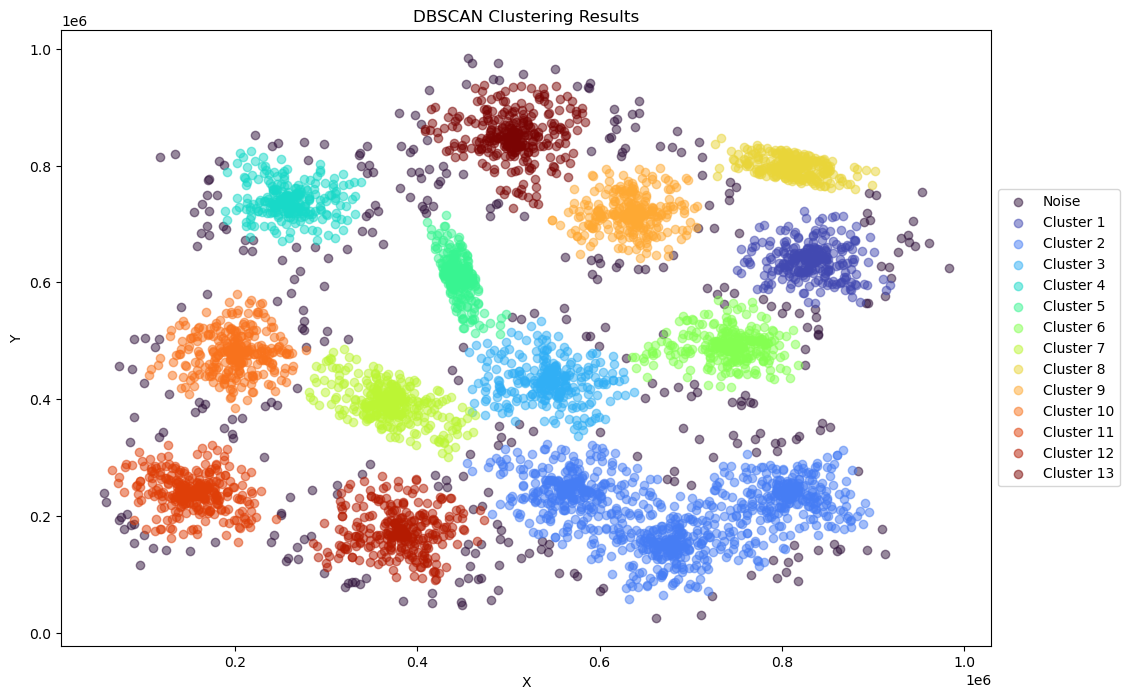

In [13]:
# selected model: eps=25000 and min_samples=12
dbscan = DBSCAN(eps=25000, min_samples=12)
dbscan.fit(X)
dbscan.plot_clusters(X)

In [14]:
#
print(dbscan.cluster_value_counts())

-1     360
 1     275
 2     937
 3     294
 4     264
 5     325
 6     314
 7     343
 8     329
 9     323
 10    320
 11    317
 12    301
 13    297
Name: count, dtype: int64


Los valores $\epsilon=25000$ y $K=12$ fueron seleccionados dado que analizando el gráfico, la formación de clusters en este caso parece razonable, pero además, si observamos la cantidad de puntos en cada cluster parecerían estar bien balanceados, sin considerar un número excesivo de muestras como ruido.

En conclusión, seleccionaría el último modelo de DBSCAN para armar clusters en este dataset. Otra opción sería normalizar el dataset previo a clusterizar. De esta manera encontrar los hiperparámetros de DBSCAN sería mas sencillo.